In [7]:
import chess

In [50]:
rew = {}

In [51]:
from src.env.chess import ChessEnv
from src.agent.q_learning_agent import QLearningAgent

# Initialize environment and agent
env = ChessEnv()
agent = QLearningAgent(learning_rate=0.1, discount_factor=0.9,
                       exploration_rate=1.0, exploration_decay=0.995)

num_episodes = 1000
qrewards = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0

    while not done:
        # Agent selects a move based on the current state
        action = agent.select_move(state)
        if action is None:
            break

        next_state, reward, done, _ = env.step(action)
        episode_reward += reward

        # Update Q-value based on the transition
        agent.update_q_value(state, action, reward, next_state, done)
        state = next_state

    # Record the cumulative reward for this episode and decay exploration
    agent.record_episode_reward(episode_reward)
    agent.decay_exploration()
    qrewards.append(episode_reward)

    if (episode + 1) % 50 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Cumulative Reward: {episode_reward}, Epsilon: {agent.epsilon:.3f}")

# Optionally, plot the reward evolution using matplotlib
rew["Q"] = qrewards
# import matplotlib.pyplot as plt

# plt.plot(agent.get_reward_history())
# plt.xlabel("Episode")
# plt.ylabel("Cumulative Capture Reward")
# plt.title("Reward Evolution over Episodes")
# plt.show()


Episode 50/1000, Cumulative Reward: 169.00000000000006, Epsilon: 0.778
Episode 100/1000, Cumulative Reward: 138.39999999999836, Epsilon: 0.606
Episode 150/1000, Cumulative Reward: 105.59999999999911, Epsilon: 0.471
Episode 200/1000, Cumulative Reward: 154.69999999999794, Epsilon: 0.367
Episode 250/1000, Cumulative Reward: 62.800000000000225, Epsilon: 0.286
Episode 300/1000, Cumulative Reward: -38.09999999999983, Epsilon: 0.222
Episode 350/1000, Cumulative Reward: 65.30000000000032, Epsilon: 0.173
Episode 400/1000, Cumulative Reward: 16.9, Epsilon: 0.135
Episode 450/1000, Cumulative Reward: 20.40000000000006, Epsilon: 0.105
Episode 500/1000, Cumulative Reward: 23.00000000000007, Epsilon: 0.082
Episode 550/1000, Cumulative Reward: 15.399999999999988, Epsilon: 0.063
Episode 600/1000, Cumulative Reward: 9.099999999999989, Epsilon: 0.049
Episode 650/1000, Cumulative Reward: 26.200000000000067, Epsilon: 0.038
Episode 700/1000, Cumulative Reward: 9.999999999999986, Epsilon: 0.030
Episode 750/

In [52]:
from src.env.chess import ChessEnv
from src.agent.sarsa_agent import SARSAAgent

# Initialize environment and SARSA agent
env = ChessEnv()
agent = SARSAAgent(learning_rate=0.1, discount_factor=0.9,
                   exploration_rate=1.0, exploration_decay=0.995)

num_episodes = 1000
sreward = []
for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    
    # Select initial action for the starting state
    action = agent.select_move(state)

    while not done:
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        
        # Select next action based on the new state (if not terminal)
        next_action = agent.select_move(next_state) if not done else None
        
        # Update the Q-value using the SARSA update rule
        agent.update_q_value(state, action, reward, next_state, next_action, done)
        
        state = next_state
        action = next_action

    # Record the cumulative reward for the episode and decay the exploration rate
    agent.record_episode_reward(episode_reward)
    agent.decay_exploration()
    sreward.append(episode_reward)

    if (episode + 1) % 5 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Cumulative Reward: {episode_reward}, Epsilon: {agent.epsilon:.3f}")

# Optionally, you can plot the reward evolution using matplotlib
# import matplotlib.pyplot as plt
rew["S"] = sreward 
# plt.plot(agent.get_reward_history())
# plt.xlabel("Episode")
# plt.ylabel("Cumulative Capture Reward")
# plt.title("SARSA Reward Evolution over Episodes")
# plt.show()


Episode 5/1000, Cumulative Reward: 106.4999999999995, Epsilon: 0.975
Episode 10/1000, Cumulative Reward: 111.19999999999955, Epsilon: 0.951
Episode 15/1000, Cumulative Reward: 92.99999999999963, Epsilon: 0.928
Episode 20/1000, Cumulative Reward: 117.69999999999867, Epsilon: 0.905
Episode 25/1000, Cumulative Reward: 83.09999999999934, Epsilon: 0.882
Episode 30/1000, Cumulative Reward: 111.19999999999871, Epsilon: 0.860
Episode 35/1000, Cumulative Reward: 144.10000000000008, Epsilon: 0.839
Episode 40/1000, Cumulative Reward: 94.79999999999936, Epsilon: 0.818
Episode 45/1000, Cumulative Reward: 96.49999999999984, Epsilon: 0.798
Episode 50/1000, Cumulative Reward: 99.8999999999997, Epsilon: 0.778
Episode 55/1000, Cumulative Reward: 167.50000000000014, Epsilon: 0.759
Episode 60/1000, Cumulative Reward: 98.89999999999945, Epsilon: 0.740
Episode 65/1000, Cumulative Reward: 124.19999999999875, Epsilon: 0.722
Episode 70/1000, Cumulative Reward: 142.49999999999827, Epsilon: 0.704
Episode 75/1000

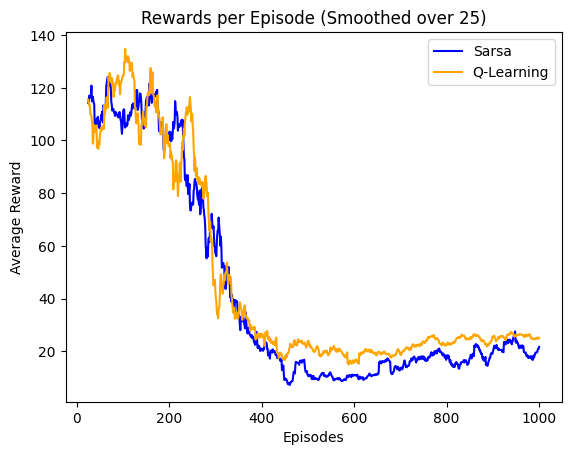

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary of rewards:
# rew = {
#     'S': [ ... 1000 rewards for Sarsa ... ],
#     'Q': [ ... 1000 rewards for Q-learning ... ]
# }

sarsa_rewards = rew['S']
qlearn_rewards = rew['Q']

window_size = 25

def smooth_rewards(rewards, window):
    """Return a rolling average over `window` episodes."""
    cumsum = np.cumsum(np.insert(rewards, 0, 0)) 
    # cumsum[i] is sum of rewards[:i], so cumsum[i+window] - cumsum[i] 
    # gives sum of window slice
    smoothed = (cumsum[window:] - cumsum[:-window]) / float(window)
    return smoothed

sarsa_smoothed = smooth_rewards(sarsa_rewards, window_size)
qlearn_smoothed = smooth_rewards(qlearn_rewards, window_size)

# Plot: shift x-axis so the first rolling average aligns with episode "window_size"
plt.plot(range(window_size, window_size + len(sarsa_smoothed)), sarsa_smoothed, label='Sarsa', color='blue')
plt.plot(range(window_size, window_size + len(qlearn_smoothed)), qlearn_smoothed, label='Q-Learning', color='orange')

plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Rewards per Episode (Smoothed over 25)')
plt.legend()
plt.show()


## Play against MCSTS agent

In [15]:
import tkinter as tk
import chess
from src.env.chess import ChessEnv
from src.agent.mcts_agent import MCTSAgent

# Constants for board drawing.
SQUARE_SIZE = 60
BOARD_SIZE = SQUARE_SIZE * 8

# Unicode mapping for chess pieces.
piece_unicode = {
    chess.PAWN:   {"white": "\u2659", "black": "\u265F"},
    chess.KNIGHT: {"white": "\u2658", "black": "\u265E"},
    chess.BISHOP: {"white": "\u2657", "black": "\u265D"},
    chess.ROOK:   {"white": "\u2656", "black": "\u265C"},
    chess.QUEEN:  {"white": "\u2655", "black": "\u265B"},
    chess.KING:   {"white": "\u2654", "black": "\u265A"},
}

class ChessGUI:
    def __init__(self, master, model, human_color="white"):
        self.master = master
        master.title("Chess: Human (Black) vs MCTS Agent (White)")
        self.canvas = tk.Canvas(master, width=BOARD_SIZE, height=BOARD_SIZE)
        self.canvas.pack()

        # Human's color: now set to "black".
        self.human_color = human_color.lower()

        # Initialize the chess environment.
        self.env = ChessEnv()
        # Initialize the MCTS agent with a chosen number of iterations.
        self.agent = MCTSAgent(model , iterations=500)

        # Reset environment and get the initial state.
        self.state = self.env.reset()

        # Variable to keep track of the human-selected square.
        self.selected_square = None

        # Bind mouse click events on the canvas.
        self.canvas.bind("<Button-1>", self.on_canvas_click)

        # Draw the initial board.
        self.draw_board()

    def draw_board(self):
        """Draws board squares and pieces onto the canvas."""
        self.canvas.delete("all")
        colors = ["#F0D9B5", "#B58863"]  # Light and dark square colors.
        for row in range(8):
            for col in range(8):
                color = colors[(row + col) % 2]
                x1 = col * SQUARE_SIZE
                y1 = row * SQUARE_SIZE
                x2 = x1 + SQUARE_SIZE
                y2 = y1 + SQUARE_SIZE
                self.canvas.create_rectangle(x1, y1, x2, y2, fill=color, tags="square")
        # Highlight a selected square if one is chosen.
        if self.selected_square is not None:
            row, col = self.selected_square
            x1 = col * SQUARE_SIZE
            y1 = row * SQUARE_SIZE
            x2 = x1 + SQUARE_SIZE
            y2 = y1 + SQUARE_SIZE
            self.canvas.create_rectangle(x1, y1, x2, y2, outline="red", width=3, tags="highlight")
        # Draw pieces using Unicode.
        board = self.env.board
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece is not None:
                row = 7 - chess.square_rank(square)  # Row 0 corresponds to rank 8.
                col = chess.square_file(square)
                x = col * SQUARE_SIZE + SQUARE_SIZE // 2
                y = row * SQUARE_SIZE + SQUARE_SIZE // 2
                color_str = "white" if piece.color == chess.WHITE else "black"
                symbol = piece_unicode[piece.piece_type][color_str]
                self.canvas.create_text(x, y, text=symbol, font=("Arial", 32), tags="piece")

    def on_canvas_click(self, event):
        """Handles clicks on the board. First click selects a piece; second click selects destination."""
        col = event.x // SQUARE_SIZE
        row = event.y // SQUARE_SIZE
        # Convert canvas coordinates to a chess square.
        square = chess.square(col, 7 - row)
        board = self.env.board

        # Check if it's the human's turn.
        if (board.turn == chess.WHITE and self.human_color == "white") or \
           (board.turn == chess.BLACK and self.human_color == "black"):
            if self.selected_square is None:
                # No piece selected yet: ensure the clicked square contains one of your pieces.
                piece = board.piece_at(square)
                if piece is not None and ((piece.color == chess.WHITE and self.human_color == "white") or 
                                          (piece.color == chess.BLACK and self.human_color == "black")):
                    self.selected_square = (row, col)
                    self.draw_board()
            else:
                # A square is already selected; try to make a move.
                start_row, start_col = self.selected_square
                start_square = chess.square(start_col, 7 - start_row)
                move = chess.Move(start_square, square)
                if move in board.legal_moves:
                    # Make the move.
                    self.state, reward, done, _ = self.env.step(move.uci())
                    self.selected_square = None
                    self.draw_board()
                    self.master.update()
                    if done:
                        self.show_result()
                        return
                    # After your move, schedule the MCTS agent's move.
                    self.master.after(500, self.agent_move)
                else:
                    # Illegal move: reset selection.
                    self.selected_square = None
                    self.draw_board()

    def agent_move(self):
        """Gets the move from the MCTS agent and applies it."""
        move = self.agent.select_move(self.state)
        if move is not None:
            self.state, reward, done, _ = self.env.step(move)
            self.draw_board()
            if done:
                self.show_result()
        else:
            self.show_result()

    def show_result(self):
        """Displays the game result on the board."""
        result = self.env.board.result()  # "1-0", "0-1", or "1/2-1/2"
        if result == "1-0":
            winner = "White"
        elif result == "0-1":
            winner = "Black"
        else:
            winner = "Draw"
        result_text = f"Game Over: {result} - {winner} wins!" if winner != "Draw" else "Game Over: Draw!"
        self.canvas.create_text(BOARD_SIZE // 2, BOARD_SIZE // 2, text=result_text,
                                font=("Arial", 24), fill="red", tags="result")

if __name__ == "__main__":
    root = tk.Tk()
    # Set the human to play as black.
    app = ChessGUI(root, model , human_color="white")
    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Nizar\.conda\envs\rl\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "c:\Users\Nizar\.conda\envs\rl\Lib\tkinter\__init__.py", line 861, in callit
    func(*args)
  File "C:\Users\Nizar\AppData\Local\Temp\ipykernel_23484\2481380520.py", line 121, in agent_move
    move = self.agent.select_move(self.state)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nizar\repos\ML\RL\Chess_AI\src\agent\mcts_agent.py", line 478, in select_move
    policy, _ = self.evaluate_state(root.state)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nizar\repos\ML\RL\Chess_AI\src\agent\mcts_agent.py", line 464, in evaluate_state
    policy_logits, value = self.model(tensor)
                           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nizar\.conda\envs\rl\Lib\site-packages\torch\nn\modules\module.py", line 1736, in _wrapped_call_impl
   

### in this we will try to train a neural network to take action  for our MCTS

In [1]:
import chess.pgn
import torch
from torch.utils.data import Dataset
import os

from src.agent.chess_dataset import ChessStockfishDataset

In [2]:
RESULT_MAP = {"1-0": 1, "0-1": -1, "1/2-1/2": 0}

In [3]:
def board_to_tensor(board):
    """Converts a python-chess board to a 8x8x12 tensor."""
    tensor = torch.zeros(12, 8, 8)
    piece_map = board.piece_map()
    for square, piece in piece_map.items():
        piece_type = piece.piece_type - 1  # 0–5
        color_offset = 0 if piece.color == chess.WHITE else 6
        row, col = divmod(square, 8)
        tensor[color_offset + piece_type, 7 - row, col] = 1
    return tensor

class ChessDataset(Dataset):
    def __init__(self, pgn_path, max_games=10000):
        self.data = []
        with open(pgn_path) as f:
            game = chess.pgn.read_game(f)
            count = 0
            while game and count < max_games:
                result = RESULT_MAP.get(game.headers["Result"])
                if result is not None:
                    board = game.board()
                    for move in game.mainline_moves():
                        state = board_to_tensor(board)
                        move_index = move_to_index(move)  # Defined below
                        self.data.append((state, move_index, result))
                        board.push(move)
                count += 1
                game = chess.pgn.read_game(f)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        state, move_idx, result = self.data[idx]
        return state, torch.tensor(move_idx), torch.tensor(result, dtype=torch.float32)
    
class CachedChessDataset(Dataset):
    def __init__(self, cache_dir):
        self.data = []
        if os.path.exists(cache_dir):
            with open(cache_dir, 'rb') as f:
                self.data = torch.load(f)
        else:
            raise FileNotFoundError(f"Cache file {cache_dir} does not exist.")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        state, move_idx, result = self.data[idx]
        return state, torch.tensor(move_idx), torch.tensor(result, dtype=torch.float32)

def move_to_index(move):
    """Maps a move to an index (simplified version)."""
    return move.from_square * 64 + move.to_square  # 0–4095

In [4]:
from torch.utils.data import random_split, DataLoader

generator = torch.Generator().manual_seed(42)  # any fixed number you like

batch_size = 4096
dataset_path = "src/data/chess_dataset_normalized.pt"

# Load full dataset
dataset = CachedChessDataset(dataset_path)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)



C:\Users\Nizar\AppData\Local\Temp\ipykernel_22428\1639820129.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data = torch.load(f)


In [5]:
# Define split sizes
val_ratio = 0.1  # 10% validation
val_size = int(len(dataset) * val_ratio)
train_size = len(dataset) - val_size

# Do the split
train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=generator)

# Create loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [6]:
print(len(train_loader.dataset), len(val_loader.dataset))

550262 61140


In [7]:
import torch.nn as nn
    
def init_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)



In [8]:
from tqdm import tqdm
from src.agent.model import AlphaGoNet, ChessNet

input_shape = (12, 8, 8)  # 12 channels for chess pieces, 8x8 board
output_shape = (4096, 1)  # 4096 possible moves
n_res_blocks = 5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def train_model(train_loader, val_loader, epochs=5, lr=1e-3, device=device):
    
    
    model = ChessNet().to(device)
    # model = AlphaGoNet(input_shape, output_shape, n_res_blocks).to(device)
    model.apply(init_weights)
    
    with torch.no_grad():
        policy, value = model(torch.randn(1, 12, 8, 8).to(device))
        print("Initial value:", value.item())
        print("Policy logits std:", policy.std().item())

    alpha_max = 1
    
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_policy = nn.CrossEntropyLoss()
    loss_value = nn.MSELoss()
    
    train_policy_losses = []
    train_value_losses = []
    val_policy_losses = []
    val_value_losses = []
    best_val_loss = float("inf")
    
    early_stop_counter = 0
    
    model.train()
    print("starting training...")
    for epoch in range(epochs):
        total_policy_loss = 0
        total_value_loss = 0
        
        total_policy_loss_val = 0
        total_value_loss_val = 0
        
        if epoch < 5:
                alpha = 0
        else:
            alpha = min( alpha_max, alpha_max * 2 * (1 - epoch / epochs ))
        
        for states, moves, values in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
            
            states = states.to(device)
            moves = moves.to(device)
            values = values.to(device)
            
            optimizer.zero_grad()
            policy_logits, value_pred = model(states)

            loss_p = loss_policy(policy_logits, moves)
            loss_v = loss_value(value_pred.squeeze(), values)

            loss = alpha * loss_p + loss_v
            # print(loss.item())
            loss.backward()
            optimizer.step()

            total_policy_loss += loss_p.item()
            total_value_loss += loss_v.item()
            
        num_batches = len(train_loader)
        avg_policy_loss = total_policy_loss / num_batches
        avg_value_loss = total_value_loss / num_batches
        
        train_policy_losses.append(avg_policy_loss)
        train_value_losses.append(avg_value_loss)

        print(f"Epoch {epoch+1} | Avg Policy Loss: {avg_policy_loss:.4f}, Avg Value Loss: {avg_value_loss:.4f}")
        
        for states, moves, values in val_loader:
            states = states.to(device)
            moves = moves.to(device)
            values = values.to(device)

            with torch.no_grad():
                policy_logits, value_pred = model(states)

                loss_p = loss_policy(policy_logits, moves)
                loss_v = loss_value(value_pred.squeeze(), values)

                total_policy_loss_val += loss_p.item()
                total_value_loss_val += loss_v.item()
                
        num_batches = len(val_loader)
        avg_policy_loss = total_policy_loss_val / num_batches
        avg_value_loss = total_value_loss_val / num_batches
        
        val_policy_losses.append(avg_policy_loss)
        val_value_losses.append(avg_value_loss)
        
        print(f"Validation | Avg Policy Loss: {avg_policy_loss:.4f}, Avg Value Loss: {avg_value_loss:.4f}")
        
        # Save the model if validation loss improved
        avg_val_loss = avg_policy_loss + 10 * avg_value_loss
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), "best_model_0.pth")
            print(f"Model saved at epoch {epoch+1} with validation loss {avg_val_loss:.4f}")
            
            early_stop_counter = 0
            
        # If validation loss is not improving for 5 epochs, stop training
        else :
            early_stop_counter += 1
            if early_stop_counter >= 10:
                print("Early stopping triggered.")
                break
            
    all_losses = {
        "train_policy": train_policy_losses,
        "train_value": train_value_losses,
        "val_policy": val_policy_losses,
        "val_value": val_value_losses,
    }
    
    return model, all_losses

Using device: cuda


In [9]:

model = train_model(train_loader, val_loader ,epochs=100, lr=1e-4, device=device)
# model = train_model("train_loader", "val_loader" ,epochs=100, lr=1e-4, device=device)

Initial value: 0.8154364228248596
Policy logits std: 0.5678616166114807
starting training...


Epoch 1: 100%|██████████| 135/135 [00:12<00:00, 10.51it/s]


Epoch 1 | Avg Policy Loss: 8.4886, Avg Value Loss: 0.2714
Validation | Avg Policy Loss: 8.4871, Avg Value Loss: 0.1943
Model saved at epoch 1 with validation loss 10.4296


Epoch 2: 100%|██████████| 135/135 [00:11<00:00, 11.37it/s]


Epoch 2 | Avg Policy Loss: 8.4851, Avg Value Loss: 0.1783
Validation | Avg Policy Loss: 8.4845, Avg Value Loss: 0.1641
Model saved at epoch 2 with validation loss 10.1259


Epoch 3: 100%|██████████| 135/135 [00:12<00:00, 11.04it/s]


Epoch 3 | Avg Policy Loss: 8.4827, Avg Value Loss: 0.1593
Validation | Avg Policy Loss: 8.4828, Avg Value Loss: 0.1551
Model saved at epoch 3 with validation loss 10.0336


Epoch 4: 100%|██████████| 135/135 [00:12<00:00, 10.96it/s]


Epoch 4 | Avg Policy Loss: 8.4812, Avg Value Loss: 0.1507
Validation | Avg Policy Loss: 8.4816, Avg Value Loss: 0.1462
Model saved at epoch 4 with validation loss 9.9437


Epoch 5: 100%|██████████| 135/135 [00:11<00:00, 11.42it/s]


Epoch 5 | Avg Policy Loss: 8.4801, Avg Value Loss: 0.1448
Validation | Avg Policy Loss: 8.4808, Avg Value Loss: 0.1472


Epoch 6: 100%|██████████| 135/135 [00:11<00:00, 11.72it/s]


Epoch 6 | Avg Policy Loss: 5.9885, Avg Value Loss: 0.1431
Validation | Avg Policy Loss: 5.4278, Avg Value Loss: 0.1431
Model saved at epoch 6 with validation loss 6.8583


Epoch 7: 100%|██████████| 135/135 [00:12<00:00, 11.18it/s]


Epoch 7 | Avg Policy Loss: 5.0530, Avg Value Loss: 0.1456
Validation | Avg Policy Loss: 4.8862, Avg Value Loss: 0.1452
Model saved at epoch 7 with validation loss 6.3379


Epoch 8: 100%|██████████| 135/135 [00:12<00:00, 11.21it/s]


Epoch 8 | Avg Policy Loss: 4.5285, Avg Value Loss: 0.1468
Validation | Avg Policy Loss: 4.5088, Avg Value Loss: 0.1482
Model saved at epoch 8 with validation loss 5.9909


Epoch 9: 100%|██████████| 135/135 [00:12<00:00, 10.64it/s]


Epoch 9 | Avg Policy Loss: 4.1623, Avg Value Loss: 0.1459
Validation | Avg Policy Loss: 4.2644, Avg Value Loss: 0.1448
Model saved at epoch 9 with validation loss 5.7128


Epoch 10: 100%|██████████| 135/135 [00:13<00:00, 10.38it/s]


Epoch 10 | Avg Policy Loss: 3.9159, Avg Value Loss: 0.1452
Validation | Avg Policy Loss: 4.1092, Avg Value Loss: 0.1461
Model saved at epoch 10 with validation loss 5.5699


Epoch 11: 100%|██████████| 135/135 [00:12<00:00, 11.03it/s]


Epoch 11 | Avg Policy Loss: 3.7380, Avg Value Loss: 0.1409
Validation | Avg Policy Loss: 3.9998, Avg Value Loss: 0.1413
Model saved at epoch 11 with validation loss 5.4132


Epoch 12: 100%|██████████| 135/135 [00:11<00:00, 11.30it/s]


Epoch 12 | Avg Policy Loss: 3.6010, Avg Value Loss: 0.1387
Validation | Avg Policy Loss: 3.9189, Avg Value Loss: 0.1439
Model saved at epoch 12 with validation loss 5.3577


Epoch 13: 100%|██████████| 135/135 [00:12<00:00, 10.61it/s]


Epoch 13 | Avg Policy Loss: 3.4900, Avg Value Loss: 0.1384
Validation | Avg Policy Loss: 3.8567, Avg Value Loss: 0.1386
Model saved at epoch 13 with validation loss 5.2422


Epoch 14: 100%|██████████| 135/135 [00:12<00:00, 11.22it/s]


Epoch 14 | Avg Policy Loss: 3.3970, Avg Value Loss: 0.1343
Validation | Avg Policy Loss: 3.8085, Avg Value Loss: 0.1386
Model saved at epoch 14 with validation loss 5.1946


Epoch 15: 100%|██████████| 135/135 [00:11<00:00, 11.49it/s]


Epoch 15 | Avg Policy Loss: 3.3169, Avg Value Loss: 0.1331
Validation | Avg Policy Loss: 3.7699, Avg Value Loss: 0.1344
Model saved at epoch 15 with validation loss 5.1142


Epoch 16: 100%|██████████| 135/135 [00:11<00:00, 11.38it/s]


Epoch 16 | Avg Policy Loss: 3.2464, Avg Value Loss: 0.1304
Validation | Avg Policy Loss: 3.7380, Avg Value Loss: 0.1326
Model saved at epoch 16 with validation loss 5.0640


Epoch 17: 100%|██████████| 135/135 [00:12<00:00, 10.88it/s]


Epoch 17 | Avg Policy Loss: 3.1834, Avg Value Loss: 0.1287
Validation | Avg Policy Loss: 3.7115, Avg Value Loss: 0.1335
Model saved at epoch 17 with validation loss 5.0466


Epoch 18: 100%|██████████| 135/135 [00:12<00:00, 10.40it/s]


Epoch 18 | Avg Policy Loss: 3.1259, Avg Value Loss: 0.1278
Validation | Avg Policy Loss: 3.6883, Avg Value Loss: 0.1323
Model saved at epoch 18 with validation loss 5.0113


Epoch 19: 100%|██████████| 135/135 [00:11<00:00, 11.69it/s]


Epoch 19 | Avg Policy Loss: 3.0738, Avg Value Loss: 0.1247
Validation | Avg Policy Loss: 3.6688, Avg Value Loss: 0.1323
Model saved at epoch 19 with validation loss 4.9915


Epoch 20: 100%|██████████| 135/135 [00:11<00:00, 11.65it/s]


Epoch 20 | Avg Policy Loss: 3.0253, Avg Value Loss: 0.1237
Validation | Avg Policy Loss: 3.6527, Avg Value Loss: 0.1279
Model saved at epoch 20 with validation loss 4.9318


Epoch 21: 100%|██████████| 135/135 [00:11<00:00, 11.29it/s]


Epoch 21 | Avg Policy Loss: 2.9799, Avg Value Loss: 0.1222
Validation | Avg Policy Loss: 3.6414, Avg Value Loss: 0.1257
Model saved at epoch 21 with validation loss 4.8986


Epoch 22: 100%|██████████| 135/135 [00:11<00:00, 11.62it/s]


Epoch 22 | Avg Policy Loss: 2.9383, Avg Value Loss: 0.1199
Validation | Avg Policy Loss: 3.6298, Avg Value Loss: 0.1337


Epoch 23: 100%|██████████| 135/135 [00:14<00:00,  9.35it/s]


Epoch 23 | Avg Policy Loss: 2.8989, Avg Value Loss: 0.1196
Validation | Avg Policy Loss: 3.6199, Avg Value Loss: 0.1239
Model saved at epoch 23 with validation loss 4.8584


Epoch 24: 100%|██████████| 135/135 [00:12<00:00, 10.95it/s]


Epoch 24 | Avg Policy Loss: 2.8613, Avg Value Loss: 0.1167
Validation | Avg Policy Loss: 3.6119, Avg Value Loss: 0.1247


Epoch 25: 100%|██████████| 135/135 [00:12<00:00, 10.73it/s]


Epoch 25 | Avg Policy Loss: 2.8260, Avg Value Loss: 0.1165
Validation | Avg Policy Loss: 3.6053, Avg Value Loss: 0.1217
Model saved at epoch 25 with validation loss 4.8225


Epoch 26: 100%|██████████| 135/135 [00:12<00:00, 10.52it/s]


Epoch 26 | Avg Policy Loss: 2.7918, Avg Value Loss: 0.1144
Validation | Avg Policy Loss: 3.6018, Avg Value Loss: 0.1212
Model saved at epoch 26 with validation loss 4.8139


Epoch 27: 100%|██████████| 135/135 [00:12<00:00, 10.56it/s]


Epoch 27 | Avg Policy Loss: 2.7594, Avg Value Loss: 0.1139
Validation | Avg Policy Loss: 3.5967, Avg Value Loss: 0.1200
Model saved at epoch 27 with validation loss 4.7965


Epoch 28: 100%|██████████| 135/135 [00:10<00:00, 12.29it/s]


Epoch 28 | Avg Policy Loss: 2.7282, Avg Value Loss: 0.1109
Validation | Avg Policy Loss: 3.5934, Avg Value Loss: 0.1202
Model saved at epoch 28 with validation loss 4.7954


Epoch 29: 100%|██████████| 135/135 [00:11<00:00, 11.76it/s]


Epoch 29 | Avg Policy Loss: 2.6980, Avg Value Loss: 0.1108
Validation | Avg Policy Loss: 3.5902, Avg Value Loss: 0.1186
Model saved at epoch 29 with validation loss 4.7764


Epoch 30: 100%|██████████| 135/135 [00:11<00:00, 11.33it/s]


Epoch 30 | Avg Policy Loss: 2.6695, Avg Value Loss: 0.1095
Validation | Avg Policy Loss: 3.5890, Avg Value Loss: 0.1184
Model saved at epoch 30 with validation loss 4.7732


Epoch 31: 100%|██████████| 135/135 [00:11<00:00, 11.63it/s]


Epoch 31 | Avg Policy Loss: 2.6415, Avg Value Loss: 0.1078
Validation | Avg Policy Loss: 3.5901, Avg Value Loss: 0.1177
Model saved at epoch 31 with validation loss 4.7676


Epoch 32: 100%|██████████| 135/135 [00:11<00:00, 11.87it/s]


Epoch 32 | Avg Policy Loss: 2.6150, Avg Value Loss: 0.1068
Validation | Avg Policy Loss: 3.5889, Avg Value Loss: 0.1172
Model saved at epoch 32 with validation loss 4.7613


Epoch 33: 100%|██████████| 135/135 [00:11<00:00, 11.92it/s]


Epoch 33 | Avg Policy Loss: 2.5891, Avg Value Loss: 0.1060
Validation | Avg Policy Loss: 3.5897, Avg Value Loss: 0.1193


Epoch 34: 100%|██████████| 135/135 [00:11<00:00, 11.40it/s]


Epoch 34 | Avg Policy Loss: 2.5637, Avg Value Loss: 0.1055
Validation | Avg Policy Loss: 3.5910, Avg Value Loss: 0.1175


Epoch 35: 100%|██████████| 135/135 [00:12<00:00, 11.06it/s]


Epoch 35 | Avg Policy Loss: 2.5398, Avg Value Loss: 0.1042
Validation | Avg Policy Loss: 3.5910, Avg Value Loss: 0.1172


Epoch 36: 100%|██████████| 135/135 [00:11<00:00, 11.59it/s]


Epoch 36 | Avg Policy Loss: 2.5160, Avg Value Loss: 0.1025
Validation | Avg Policy Loss: 3.5941, Avg Value Loss: 0.1278


Epoch 37: 100%|██████████| 135/135 [00:11<00:00, 12.02it/s]


Epoch 37 | Avg Policy Loss: 2.4926, Avg Value Loss: 0.1038
Validation | Avg Policy Loss: 3.5968, Avg Value Loss: 0.1136
Model saved at epoch 37 with validation loss 4.7328


Epoch 38: 100%|██████████| 135/135 [00:12<00:00, 11.15it/s]


Epoch 38 | Avg Policy Loss: 2.4701, Avg Value Loss: 0.1000
Validation | Avg Policy Loss: 3.5994, Avg Value Loss: 0.1130
Model saved at epoch 38 with validation loss 4.7289


Epoch 39: 100%|██████████| 135/135 [00:11<00:00, 12.26it/s]


Epoch 39 | Avg Policy Loss: 2.4490, Avg Value Loss: 0.0994
Validation | Avg Policy Loss: 3.6032, Avg Value Loss: 0.1120
Model saved at epoch 39 with validation loss 4.7234


Epoch 40: 100%|██████████| 135/135 [00:12<00:00, 11.00it/s]


Epoch 40 | Avg Policy Loss: 2.4278, Avg Value Loss: 0.1004
Validation | Avg Policy Loss: 3.6069, Avg Value Loss: 0.1287


Epoch 41: 100%|██████████| 135/135 [00:10<00:00, 12.66it/s]


Epoch 41 | Avg Policy Loss: 2.4069, Avg Value Loss: 0.0983
Validation | Avg Policy Loss: 3.6114, Avg Value Loss: 0.1129


Epoch 42: 100%|██████████| 135/135 [00:10<00:00, 12.85it/s]


Epoch 42 | Avg Policy Loss: 2.3863, Avg Value Loss: 0.0983
Validation | Avg Policy Loss: 3.6167, Avg Value Loss: 0.1222


Epoch 43: 100%|██████████| 135/135 [00:10<00:00, 12.54it/s]


Epoch 43 | Avg Policy Loss: 2.3665, Avg Value Loss: 0.0978
Validation | Avg Policy Loss: 3.6205, Avg Value Loss: 0.1104


Epoch 44: 100%|██████████| 135/135 [00:10<00:00, 12.93it/s]


Epoch 44 | Avg Policy Loss: 2.3473, Avg Value Loss: 0.0954
Validation | Avg Policy Loss: 3.6285, Avg Value Loss: 0.1100


Epoch 45: 100%|██████████| 135/135 [00:10<00:00, 12.45it/s]


Epoch 45 | Avg Policy Loss: 2.3284, Avg Value Loss: 0.0959
Validation | Avg Policy Loss: 3.6326, Avg Value Loss: 0.1136


Epoch 46: 100%|██████████| 135/135 [00:11<00:00, 11.91it/s]


Epoch 46 | Avg Policy Loss: 2.3092, Avg Value Loss: 0.0945
Validation | Avg Policy Loss: 3.6393, Avg Value Loss: 0.1094


Epoch 47: 100%|██████████| 135/135 [00:12<00:00, 10.39it/s]


Epoch 47 | Avg Policy Loss: 2.2913, Avg Value Loss: 0.0945
Validation | Avg Policy Loss: 3.6434, Avg Value Loss: 0.1104


Epoch 48: 100%|██████████| 135/135 [00:10<00:00, 12.65it/s]


Epoch 48 | Avg Policy Loss: 2.2738, Avg Value Loss: 0.0924
Validation | Avg Policy Loss: 3.6513, Avg Value Loss: 0.1107


Epoch 49: 100%|██████████| 135/135 [00:11<00:00, 12.21it/s]


Epoch 49 | Avg Policy Loss: 2.2564, Avg Value Loss: 0.0936
Validation | Avg Policy Loss: 3.6572, Avg Value Loss: 0.1102
Early stopping triggered.


In [10]:
model, losses = model

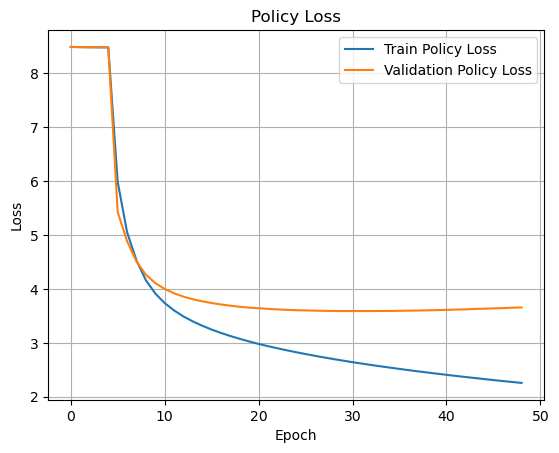

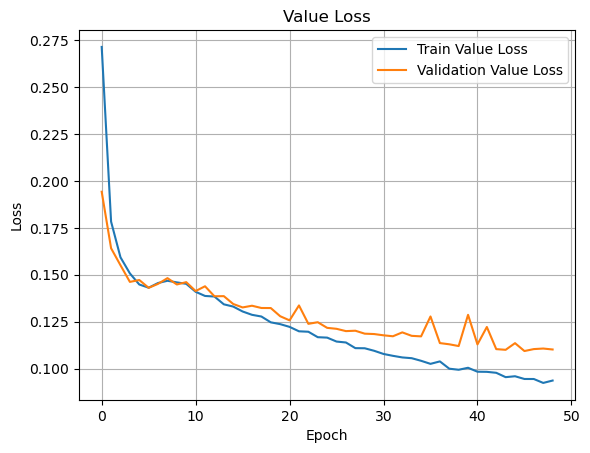

In [11]:
import matplotlib.pyplot as plt

# Assuming all_losses is already defined
# {
#     "train_policy": train_policy_losses,
#     "train_value": train_value_losses,
#     "val_policy": val_policy_losses,
#     "val_value": val_value_losses,
# }

# Plot policy losses
plt.figure()
plt.plot(losses["train_policy"], label="Train Policy Loss")
plt.plot(losses["val_policy"], label="Validation Policy Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Policy Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot value losses
plt.figure()
plt.plot(losses["train_value"], label="Train Value Loss")
plt.plot(losses["val_value"], label="Validation Value Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Value Loss")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
torch.save(model.state_dict(), "model.pth")

### surviving project

In [17]:
import chess.pgn

def filter_endgames_from_pgn(pgn_path, output_path, max_pieces=6):
    """
    Filters games that reached endgame phase and saves the FEN positions.
    Args:
        pgn_path: Path to input PGN file.
        output_path: Path to save filtered FEN positions.
        max_pieces: Max number of pieces to consider as endgame.
    """
    count = 0
    with open(pgn_path) as pgn, open(output_path, "w") as out:
        while True:
            game = chess.pgn.read_game(pgn)
            if game is None:
                break
            board = game.board()
            for move in game.mainline_moves():
                board.push(move)
                num_pieces = len(board.piece_map())
                if num_pieces <= max_pieces:
                    out.write(board.fen() + "\n")
                    count += 1
                    break  # Only take the first endgame position
    print(f"Extracted {count} endgame positions.")

# Example usage:
filter_endgames_from_pgn("src/data/white_wins_1.pgn", "filtered_endgames.fen", max_pieces=6)


KeyboardInterrupt: 

In [18]:
import torch
from torch.utils.data import Dataset
import chess
import numpy as np

class EndgameDataset(Dataset):
    def __init__(self, fen_file):
        """
        fen_file: Path to .fen file with one FEN per line.
        """
        with open(fen_file, "r") as f:
            self.fens = [line.strip() for line in f]

    def board_to_tensor(self, board):
        tensor = np.zeros((12, 8, 8), dtype=np.float32)
        piece_map = board.piece_map()
        for square, piece in piece_map.items():
            piece_type = piece.piece_type - 1  # pawn=0
            color_offset = 0 if piece.color == chess.WHITE else 6
            row, col = divmod(square, 8)
            tensor[color_offset + piece_type, 7 - row, col] = 1
        return tensor

    def __len__(self):
        return len(self.fens)

    def __getitem__(self, idx):
        fen = self.fens[idx]
        board = chess.Board(fen)
        state = self.board_to_tensor(board)
        # Dummy policy target → you can use legal moves for supervised learning
        legal_moves = list(board.legal_moves)
        move = np.random.choice(legal_moves).uci()
        move_idx = chess.Move.from_uci(move).from_square * 64 + chess.Move.from_uci(move).to_square
        # Dummy value target → 0 (neutral) because we don't know game result
        value = 0.0
        return torch.tensor(state), torch.tensor(move_idx), torch.tensor(value, dtype=torch.float32)


In [20]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

def train_on_endgames(fen_file, epochs=5, batch_size=64, lr=1e-3):
    dataset = EndgameDataset(fen_file)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    model = ChessNet()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_policy = nn.CrossEntropyLoss()
    loss_value = nn.MSELoss()

    model.train()
    for epoch in range(epochs):
        total_policy_loss = 0
        total_value_loss = 0
        for states, moves, values in tqdm(dataloader, desc=f"Epoch {epoch+1}"):
            optimizer.zero_grad()
            policy_logits, value_pred = model(states)

            loss_p = loss_policy(policy_logits, moves)
            loss_v = loss_value(value_pred.squeeze(), values)

            loss = loss_p + loss_v
            loss.backward()
            optimizer.step()

            total_policy_loss += loss_p.item()
            total_value_loss += loss_v.item()

        print(f"Epoch {epoch+1}: Policy Loss = {total_policy_loss:.4f}, Value Loss = {total_value_loss:.4f}")

    torch.save(model.state_dict(), "chess_endgame_model.pth")
    print("✅ Model trained and saved as 'chess_endgame_model.pth'.")

# Example usage:
train_on_endgames("filtered_endgames.fen", epochs=120, batch_size=64, lr=1e-3)


Epoch 1:  20%|██        | 4/20 [00:00<00:02,  6.68it/s]


ValueError: 'a' cannot be empty unless no samples are taken

In [22]:
import chess.pgn

def filter_endgames_pgn(input_pgn, output_pgn, max_pieces=6, max_games=1000):
    """
    Filters games that reached endgame phase and saves them as PGN.
    Args:
        input_pgn: Input PGN file path (Lichess, etc.)
        output_pgn: Output PGN file path to save filtered games
        max_pieces: Max number of pieces considered as endgame
        max_games: Max number of filtered games to save
    """
    count = 0
    with open(input_pgn, "r") as infile, open(output_pgn, "w") as outfile:
        while count < max_games:
            game = chess.pgn.read_game(infile)
            if game is None:
                break  # End of file

            board = game.board()
            for move in game.mainline_moves():
                board.push(move)
                num_pieces = len(board.piece_map())
                if num_pieces <= max_pieces:
                    # Save entire PGN of this game
                    outfile.write(str(game) + "\n\n")
                    count += 1
                    break  # Only save one copy per game
            print(count)
        print(f"✅ Saved {count} endgame games to {output_pgn}")

# Example usage:
filter_endgames_pgn("src/data/white_wins_1.pgn", "filtered_endgames.pgn", max_pieces=6, max_games=1000)


0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
5
5
5
6
6
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
2